# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv('dataset_SCL.csv')

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<AxesSubplot:>

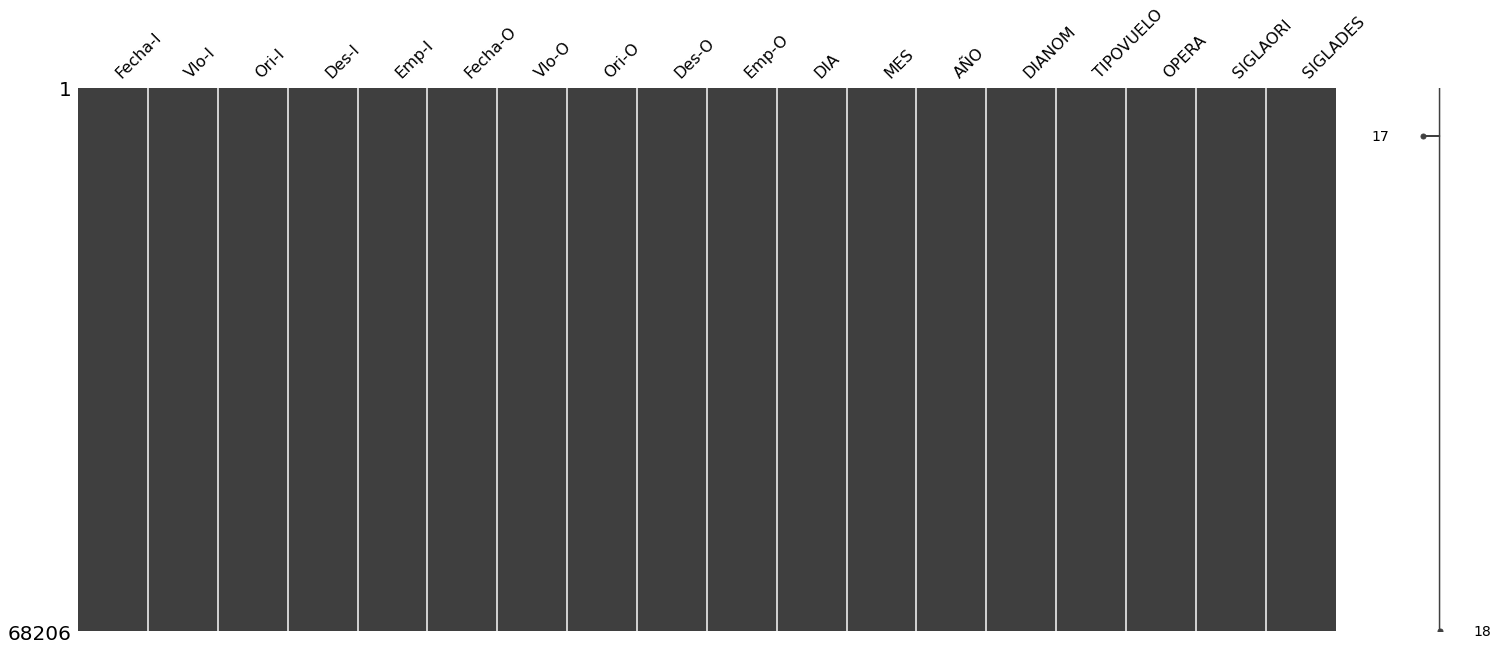

In [5]:
msng.matrix(df)

In [6]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

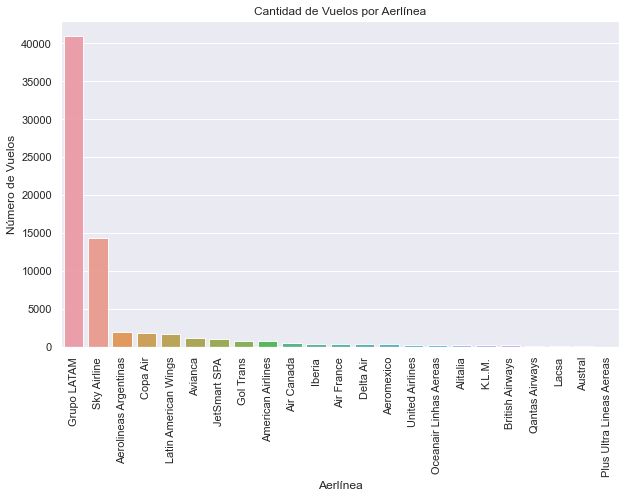

In [7]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(vuelos_aerolineas.index, vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

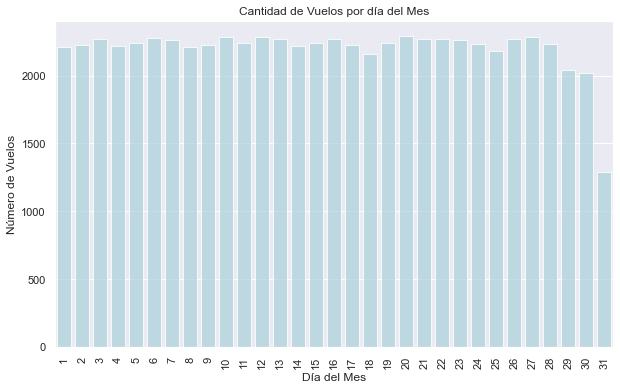

In [8]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(vuelos_dia.index, vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

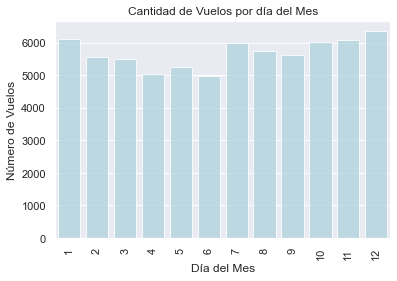

In [9]:
vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(vuelos_mes.index, vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

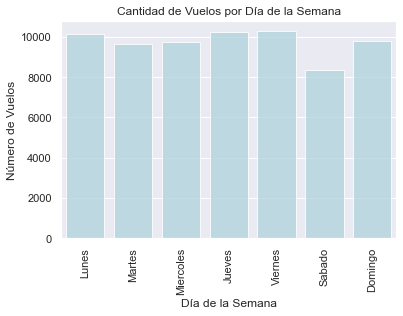

In [10]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(dias, valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

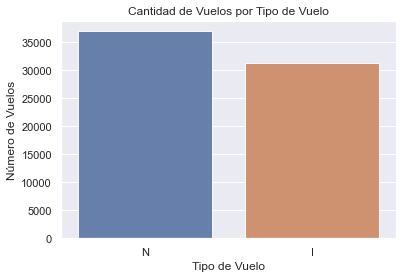

In [11]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

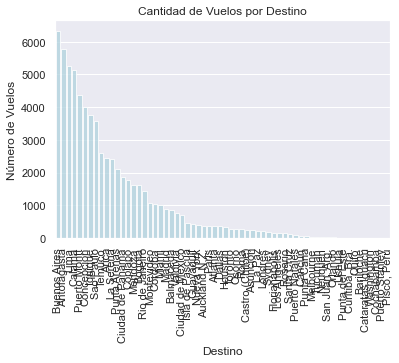

In [12]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [13]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [14]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [15]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [16]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [17]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [18]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [19]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [20]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [21]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [22]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [23]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [24]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
...,...
Cataratas Iguacu,0.00
Washington,0.00
Cochabamba,1.00
Puerto Stanley,1.00


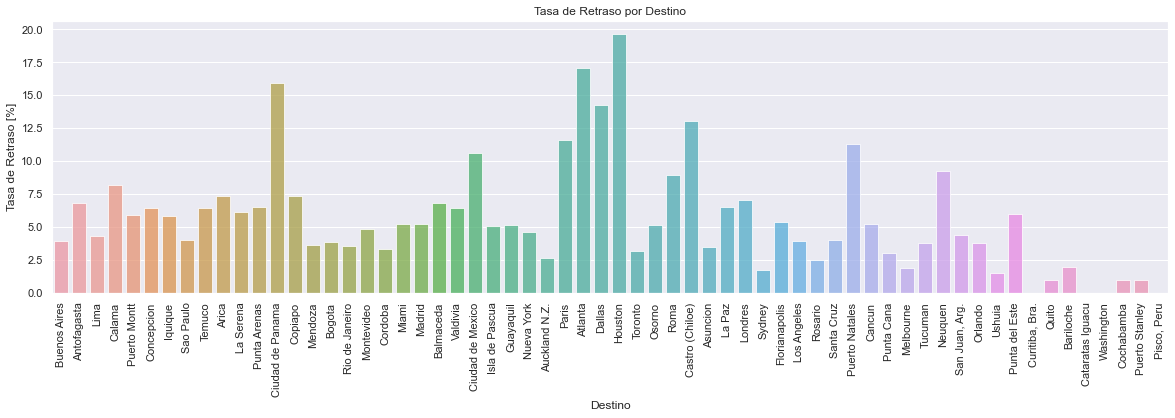

In [25]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(df['SIGLADES'].value_counts().index, tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [26]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46
Avianca,3.76
JetSmart SPA,5.59
Gol Trans,2.81
American Airlines,14.84
Air Canada,2.19


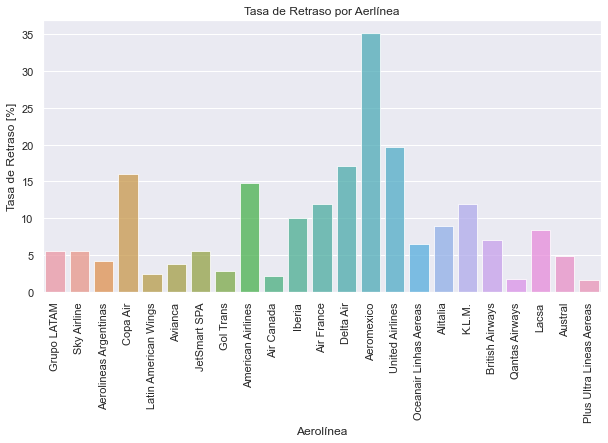

In [27]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_aerolineas_values, tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [28]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,3.94
1,6.25
11,5.07
10,4.43
7,3.41
8,5.77
9,5.80
2,6.60
3,8.69
5,6.34


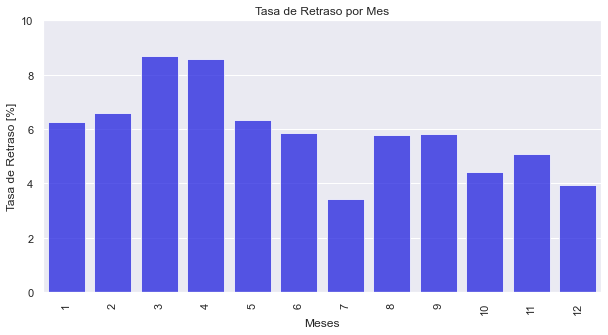

In [29]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_meses_values, tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

In [30]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,4.50
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


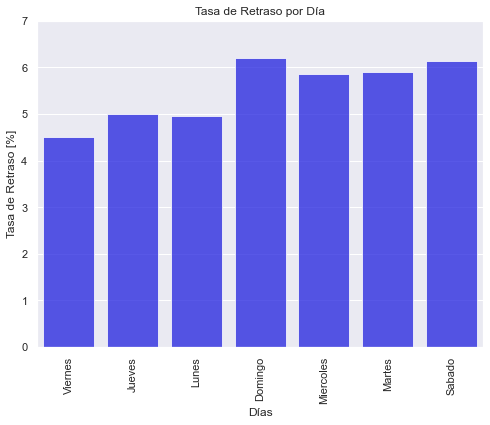

In [31]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(tasas_dias_values, tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

In [32]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


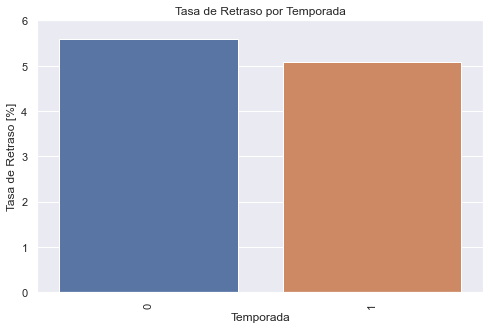

In [33]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(tasas_temporada_values, tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

In [34]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


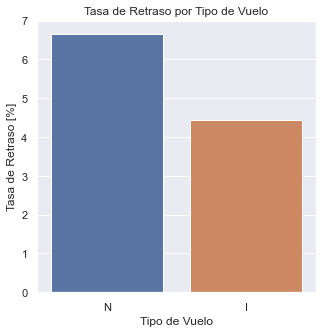

In [35]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_tipovuelo_values, tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

In [36]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


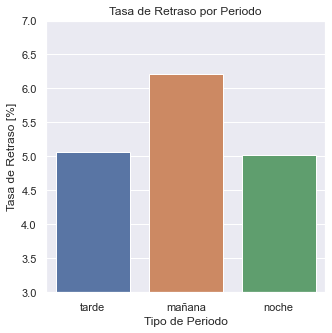

In [37]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_periodo_values, tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

In [40]:
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [42]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [43]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [44]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [45]:
logReg = LogisticRegression()
model_lr = logReg.fit(x_train, y_train)

In [46]:
y_pred_lr = model_lr.predict(x_test)

#### Métricas Regresión Logística

In [47]:
confusion_matrix(y_test, y_pred_lr)

array([[18311,    92],
       [ 3985,   120]])

In [48]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost

In [49]:
import xgboost as xgb
from xgboost import plot_importance

In [50]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)


In [51]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [52]:
confusion_matrix(y_test, y_predxgb)

array([[18359,    44],
       [ 4017,    88]])

In [54]:
print(classification_report(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.67      0.02      0.04      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.47     22508
weighted avg       0.79      0.82      0.74     22508



#### Utilizando XGBoost dejando Features más importantes 

In [55]:
modelxgb.feature_importances_

array([0.01000502, 0.03812766, 0.0774048 , 0.        , 0.        ,
       0.05326247, 0.        , 0.        , 0.        , 0.11452038,
       0.        , 0.05899746, 0.00510737, 0.        , 0.00056586,
       0.        , 0.        , 0.03438188, 0.        , 0.00872514,
       0.0687452 , 0.03494434, 0.02305363, 0.17575102, 0.        ,
       0.01610017, 0.00777403, 0.02387431, 0.00835021, 0.01279221,
       0.01183943, 0.06969901, 0.00991499, 0.01740215, 0.03937674,
       0.02739293, 0.05189164], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 936x720 with 0 Axes>

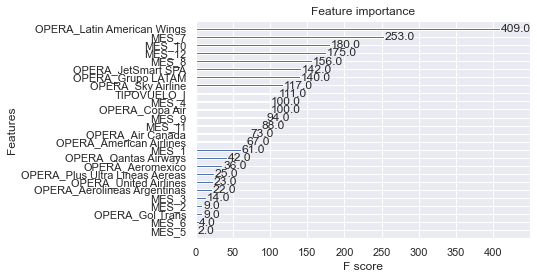

In [56]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

In [57]:
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]
labels_ = label

In [58]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [59]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb = modelxgb.fit(x_train2, y_train2)

In [60]:
y_predxgb = modelxgb.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [61]:
confusion_matrix(y_test2, y_predxgb)

array([[18371,    32],
       [ 4044,    61]])

In [62]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_GridCV = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.4min finished


In [65]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)

In [66]:
confusion_matrix(y_test, y_predxgb_grid)

array([[18287,   116],
       [ 3933,   172]])

### Upsampling

In [67]:
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [68]:
#Resample
from sklearn.utils import resample

data_no_retraso = data[data['atraso_15'] == 0]
data_atraso = data[data['atraso_15'] == 1]

data_atraso_upsampled = resample(data_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [69]:
data_upsampled['atraso_15'].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [70]:
features_upsampled = pd.concat([pd.get_dummies(data_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_upsampled['atraso_15']

In [71]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [72]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)

In [74]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]])

In [75]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

In [76]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.

In [77]:
#############----------------END-TRABAJO-JUAN------------#################

## Codigo Diego 

In [78]:
import itertools
import random
import joblib
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Traeremos una funcion para graficar las matrices de confusion y otra para evaluar los modelos con metricas de desemepeño. 

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalized=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Matriz de confusion normalizada'
        fmt = '.2f'
    else:
        title='Matriz de confusion no normalizada'
        fmt = 'd'
        
    plt.figure(figsize=(4, 4), dpi=90)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')
    plt.tight_layout()
target_names = [
    'Spruce-Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]

def performance_metrics(TP, FP, FN, TN):
    """Calcula metricas de desempeño.
    
    Args:
        TP: Numero de verdaderos positivos.
        FP: Numero de falsos positivos.
        FN: Numero de falsos negativos.
        TN: Numero de verdaderos negativos.
    
    Returns:
        accuracy: Porcentaje de clasificaciones correctas del detector.
        precision: Precision del detector.
        recall: Recall/Sensibilidad del detector.
    """
    accuracy = 100.0 * (TP + TN) / (TP + TN + FP + FN)
    precision = 100.0 * TP / (TP + FP)
    recall = 100.0 * TP / (TP + FN)
    f1score = (2*precision*recall)/(precision+recall)
    print('TP: %d, TN: %d, FP: %d, FN: %d' %(TP,TN,FP,FN))
    print('%1.4f%% Accuracy (Porcentaje de clasificaciones correctas)' % (accuracy))
    print('%1.4f%% Precision' % (precision))
    print('%1.4f%% Recall' % (recall))
    print('%1.4f%% F1 Score' % (f1score))
    print('')
    return accuracy, precision, recall, f1score

1 -Escoge el modelo que a tu criterio tenga una mejor performance, argumentando tu decisión.

In [80]:
#esta es la forma en que juan observaba sus resultados.
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



Resultados Regresion Lineal: 
--------------------------- 

TP: 18311, TN: 120, FP: 92, FN: 3985
81.8864% Accuracy (Porcentaje de clasificaciones correctas)
99.5001% Precision
82.1268% Recall
89.9826% F1 Score



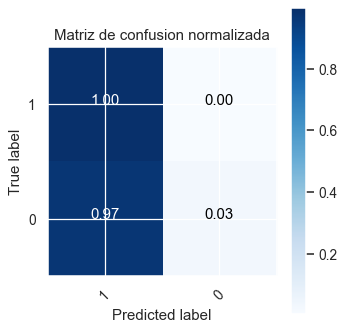

In [81]:
print('Resultados Regresion Lineal: \n--------------------------- \n' )
cm = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm,[1,0])
[[TP, FP], [FN, TN]] = confusion_matrix(y_test, y_pred_lr)
accuracy, precision, recall, f1score = performance_metrics(TP, FP, FN, TN)

Resultados XGBoost: 
---------------- 

TP: 18371, TN: 61, FP: 32, FN: 4044
81.8909% Accuracy (Porcentaje de clasificaciones correctas)
99.8261% Precision
81.9585% Recall
90.0142% F1 Score



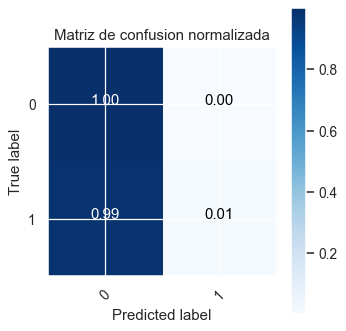

In [82]:
print('Resultados XGBoost: \n---------------- \n')
cm = confusion_matrix(y_test, y_predxgb)
plot_confusion_matrix(cm,[0,1])
[[TP, FP], [FN, TN]] = confusion_matrix(y_test, y_predxgb)
accuracy, precision, recall, f1score = performance_metrics(TP, FP, FN, TN)

Observamos que ambos algoritmos tienen performance parecidos pero ambos presentan muchos Falsos Negativos que no logra reflejarse en las metricas. Esto es porque los Verdaderos Positivos >> Falsos positivos por el desbalance de clases por lo que hace que todas las metricas muestren erroneamente buenos resultados. El algoritmo predice que todo los vuelos no llegaran tarde (ya que como se entro los datos como positivos el caso que predice 0)

Elijeremos XGBoost dado que trabaja con arboles de decisión por detras y tienen más parametros ajustables que la regresion lineal. Pero nos enfocaremos de igual en hacer un balance de datos para tener metricas mas representativas

En primera instancia, balancearmos las clases, Juan hace un "upsampling" crea nuevos datos a partir de los que tiene, pero buscaremos hacer un down sampling a la clase de no atrasados para lograr tener esta proporción. Creemos que es mas enriquecedor trabajar solo con data veridica y no repetir o crear datos artificiales. Buscaremos:

-40% de vuelos atrasados (todos los datos de vuelos atrasados)

-60% de vuelos no atrasados (aqui tomaremos un porcentaje de los vuelos para llegar a esta proporcion)

Queremos imponer esta proporcion en los set de training y test. Juan usa 33% datos train y 66% test del total de datos. La proporcion tiene que cumplirse en ambos sets.

In [83]:
#observamos la cantidad total de vuelos atrasados (1) y no atrasados(2)
data['atraso_15'].value_counts()


0    55592
1    12614
Name: atraso_15, dtype: int64

In [84]:
data

,OPERA,MES,TIPOVUELO,SIGLADES,DIANOM,atraso_15
13375,Sky Airline,3,N,Antofagasta,Viernes,0
35799,Grupo LATAM,7,N,Concepcion,Jueves,0
48176,Grupo LATAM,9,N,Arica,Miercoles,0
58675,Grupo LATAM,11,N,Iquique,Viernes,0
23374,Sky Airline,5,N,Valdivia,Lunes,0
...,...,...,...,...,...,...
37831,Grupo LATAM,7,I,Sao Paulo,Domingo,0
28790,Sky Airline,6,N,La Serena,Viernes,1
25257,Grupo LATAM,5,N,Temuco,Domingo,0
4820,Grupo LATAM,1,I,Buenos Aires,Jueves,0


In [85]:
# separamos los clases por atrasado o no
class_0 = data[data['atraso_15'] == 0]
class_1 = data[data['atraso_15'] == 1]

# se cuenta el numero de clases en cada una
count_class_0, count_class_1 = data['atraso_15'].value_counts()

# undersamplemos la clase mayoritaria (0) para tener 1.5 veces mas que la clase 1 (para tener la relacion 40,60)
class_0_under = class_0.sample(int(count_class_1*1.5))

# se concatena las dos clases
balanced_data = pd.concat([class_0_under, class_1], axis=0)

balanced_data = balanced_data.sample(frac=1, random_state=42)

In [86]:
#obsevamos si se cumple la clase
c_0, c_1 = balanced_data['atraso_15'].value_counts()
total=c_0+c_1
print('clase 0: '+str(c_0)+', porcentaje del total: '+str(c_0*100/total) +'% \nclase 1: '+str(c_1)+', porcentaje del total: '+str(c_1*100/total)+'%')

clase 0: 18921, porcentaje del total: 60.0% 
clase 1: 12614, porcentaje del total: 40.0%


In [87]:
balanced_data.columns

Index(['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15'], dtype='object')

Para el procesamiento , juan utiliza get dummies, pero no es eficiente para trabajar con unseen data. Por lo mismo, se utilizará el metodo one hot encoder, que es la funcion get_dummies pero de scikit learn, combinado con column transformer (tambien de scikit learn) para sacar dummies de varias variables. 

Es importante exportar el modelo column transformer para poder procesar las variables en el modelo rest api dado que debe tiene la misma estructura que con el modelo con el que se entrenó.

In [88]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse=False), ['OPERA', 'MES', 'TIPOVUELO'])], remainder='passthrough')


label = balanced_data['atraso_15']

# use the column transformer to transform the data
transformed_data = column_transformer.fit_transform(balanced_data)

# create a new dataframe with the dummy variables
features = pd.DataFrame(transformed_data, columns=column_transformer.get_feature_names())


#se exporta el preprocesamiento de gener las variables dummies 
joblib.dump(column_transformer, 'column-transformer.joblib') 


['column-transformer.joblib']

In [89]:
#other_variables=[ 'Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I','Emp-I', 'Fecha-O', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'AÑO', 'DIANOM', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']
columnas_a_borrar=['SIGLADES', 'DIANOM', 'atraso_15']

#se eliminan las variables que no usó juan
for variable_to_delete in columnas_a_borrar:
    del features[variable_to_delete]

In [90]:
#me generó un error sobre que las columnas no objetos. Todos los valores son 0 y 1 asi que se hará un repaso por 
#cada columna y se pasará a numerico
for column_name in features.columns:
    features[column_name]=pd.to_numeric(features[column_name])

label=pd.to_numeric(label)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)


In [92]:
modelxgb_balanced = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb_balanced = modelxgb_balanced.fit(x_train, y_train)
y_predxgb_balanced = modelxgb_balanced.predict(x_test)

Resultados XGBoost con data balanceada: 
------------------------------ 

TP: 5776, TN: 893, FP: 555, FN: 3183
64.0819% Accuracy (Porcentaje de clasificaciones correctas)
91.2336% Precision
64.4715% Recall
75.5526% F1 Score



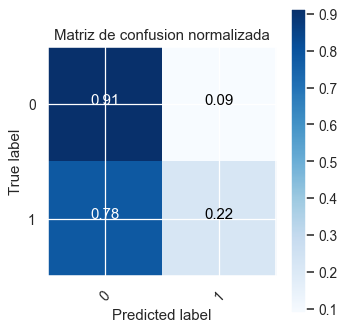

In [93]:
print('Resultados XGBoost con data balanceada: \n------------------------------ \n')
cm = confusion_matrix(y_test, y_predxgb_balanced)
plot_confusion_matrix(cm,[0,1])
[[TP, FP], [FN, TN]] = confusion_matrix(y_test, y_predxgb_balanced)
accuracy, precision, recall, f1score = performance_metrics(TP, FP, FN, TN)

Ahora si tenemos una precisión mas representativa dado que la clase negativa es del mismo orden de magnitud que la clase positiva. A partir de aca iremos tuneando el XGBoost para poder hacer que no clasifica casi todo como negativa

In [94]:
#observamos los hiperparametros del modelo
print(modelxgb_balanced.get_xgb_params())

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'interaction_constraints': '', 'learning_rate': 0.01, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


utiizaremos la misma idea que juan que usó gridsearch pero con mas hiperparametros.

In [ ]:
parameters = {  'objective':['binary:logistic','binary:logitraw','binary:hinge'],
                'learning_rate': [0.01,0.03, 0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.2, 0.5 , 0.9],
                'sampling_method':['uniform','gradient_based'],
                'tree_method':['exact','approx','hist']
               
}

modelxgb_GridCV_balanced = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 5, n_jobs=-1, verbose=1, scoring='accuracy').fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2060 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 2738 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 25.9min finished


In [ ]:
#miramos cuales son los mejores parametros del modelo
print(modelxgb_GridCV_balanced.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100, 'objective': 'binary:logistic', 'sampling_method': 'uniform', 'subsample': 0.2, 'tree_method': 'exact'}


Resultados XGBoost con data balanceada 
 e hiperparametros iterados: 
------------------------------ 

TP: 5149, TN: 1542, FP: 1182, FN: 2534
64.2933% Accuracy (Porcentaje de clasificaciones correctas)
81.3300% Precision
67.0181% Recall
73.4837% F1 Score



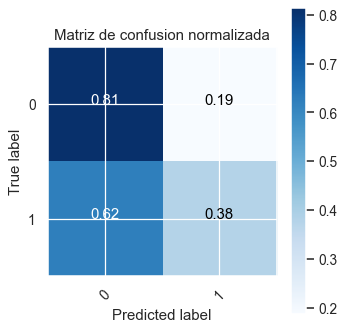

In [ ]:
print('Resultados XGBoost con data balanceada \n e hiperparametros iterados: \n------------------------------ \n')
y_predxgb_gridcv_balanced = modelxgb_GridCV_balanced.predict(x_test)
cm = confusion_matrix(y_test, y_predxgb_gridcv_balanced)
plot_confusion_matrix(cm,[0,1])
[[TP, FP], [FN, TN]] = confusion_matrix(y_test, y_predxgb_gridcv_balanced)
accuracy, precision, recall, f1score = performance_metrics(TP, FP, FN, TN)

In [ ]:
#se exporta el modelo para utilizarlo en el script formato api
joblib.dump(modelxgb_GridCV_balanced, 'XGBoost-model.joblib')

El modelo mejoró un 3% en accuracy y aumentó el numero de Verdaderos Negativos (que es lo que se busca) pero tambien aumentaron los Falsos positovs (555 a 1182). El modelo empieza a adaptarse a lo que queremos pero aun asi queda siendo insuficiente. 64 % de accuracy es muy bajo

El modelo tiene pocas variables de entrada, para enriquecer estos modelos sirve entregar todo tipo de información. En este caso solo agregaremos las variables 'SIGLADES' y 'DIANOM' que ya estan validadas por el trabajo de Juan. Para seguir mejorando estos modelos se podrian agregar datos del tiempo en cada dia, estado del aeropuerto del momento etc.


In [96]:
#Column Transformer para mas  variables
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse=False), ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM'])], remainder='passthrough')

label = balanced_data['atraso_15']

# use the column transformer to transform the data
transformed_data = column_transformer.fit_transform(balanced_data)

# create a new dataframe with the dummy variables
features = pd.DataFrame(transformed_data, columns=column_transformer.get_feature_names())

#se exporta el preprocesamiento de gener las variables dummies 
joblib.dump(column_transformer, 'column-transformer.joblib') 

del features['atraso_15']

In [97]:
#me generó un error sobre que las columnas no objetos. Todos los valores son 0 y 1 asi que se hará un repaso por 
#cada columna y se pasará a numerico
for column_name in features.columns:
    features[column_name]=pd.to_numeric(features[column_name])

label=pd.to_numeric(label)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [104]:
parameters = {  'objective':['binary:logistic','binary:logitraw','binary:hinge'],
                'learning_rate': [0.01,0.03, 0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.2, 0.5 , 0.9],
                'sampling_method':['uniform','gradient_based'],
                'tree_method':['exact','approx','hist']
               
}

modelxgb_GridCV_balanced = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 5, n_jobs=-1, verbose=1, scoring='accuracy').fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 121.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 150.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 151.0min finished


In [107]:
y_predxgb_GridCV_balanced = modelxgb_GridCV_balanced.predict(x_test)

Resultados XGBoost con más parametros de entrada, 
 mejores hiperparametros y con data balanceada: 
---------------------------------------- 

TP: 5331, TN: 1473, FP: 1000, FN: 2603
65.3791% Accuracy (Porcentaje de clasificaciones correctas)
84.2047% Precision
67.1918% Recall
74.7424% F1 Score



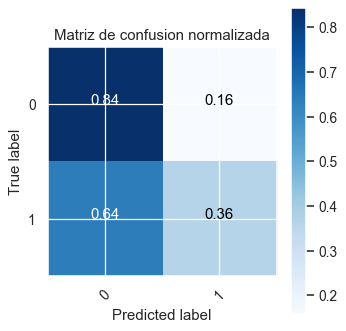

In [110]:
print('Resultados XGBoost con más parametros de entrada, \n mejores hiperparametros y con data balanceada: \n---------------------------------------- \n')
cm = confusion_matrix(y_test, y_predxgb_GridCV_balanced)
plot_confusion_matrix(cm,[0,1])
[[TP, FP], [FN, TN]] = confusion_matrix(y_test, y_predxgb_balanced)
accuracy, precision, recall, f1score = performance_metrics(TP, FP, FN, TN)

Observamos que existe un leve mejoramiento del modelo, haciendo elevar todas las metricas entre 1 y 3 %. No obstante, sigue teniendo un bajo performance. 

Se utilizará el modelo con 3 variables de entrada (mes, tipovuelo y opera)dado que el desempeño es muy similar a este ultimo y facilitará las pruebas de rendimiento de la API. 

De todas maneras, quedan muchas puertas abiertas para mejorar el modelo. Por mi parte probaria con algoritmos más sencillo que XGBoost dado que este es un algoritmo que sale de Gradient Boosting que sale de Arbol de decision. Siempre es mejor partir desde lo más sencilo hacia lo más especifico. El hecho que haya tenido las clases tan desbalanceada daba resultados de performance un poco extrañas. Tambien se cree que juntar la mayor cantidad de variables de entrada  siempre hara mejor los algoritmos en terminos de resultados